In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


c:\Users\suees\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [12]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [13]:
y_test.shape,X_train.shape

((10000,), (60000, 28, 28))

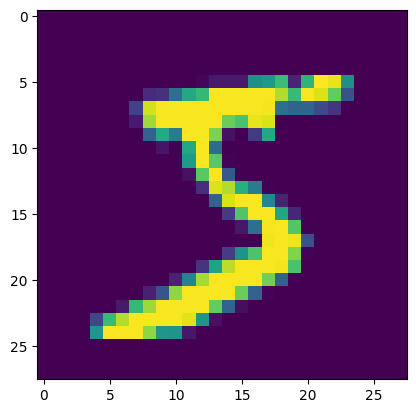

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()



In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\suees\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [19]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9168 - loss: 0.2873 - val_accuracy: 0.9572 - val_loss: 0.1498
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9630 - loss: 0.1217 - val_accuracy: 0.9680 - val_loss: 0.1084
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9743 - loss: 0.0827 - val_accuracy: 0.9677 - val_loss: 0.1108
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9806 - loss: 0.0634 - val_accuracy: 0.9735 - val_loss: 0.0909
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9849 - loss: 0.0483 - val_accuracy: 0.9720 - val_loss: 0.1055
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0384 - val_accuracy: 0.9717 - val_loss: 0.0976
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0327 - val_accuracy: 0.9751 - val_loss: 0.0949
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9914 - loss: 0.0260 -

In [23]:
y_pred = model.predict(X_test)
y_pred =y_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9768

In [25]:
history.history

{'accuracy': [0.9167500138282776,
  0.9630416631698608,
  0.9743124842643738,
  0.9805625081062317,
  0.9848958253860474,
  0.9883124828338623,
  0.9893125295639038,
  0.9913541674613953,
  0.992145836353302,
  0.9931250214576721,
  0.9940000176429749,
  0.9952083230018616,
  0.9936041831970215,
  0.9960208535194397,
  0.9958958625793457,
  0.9956250190734863,
  0.996791660785675,
  0.9962083101272583,
  0.9959375262260437,
  0.9971250295639038,
  0.9973541498184204,
  0.9971666932106018,
  0.996833324432373,
  0.9968125224113464,
  0.996708333492279],
 'loss': [0.2873171865940094,
  0.1217491552233696,
  0.08265405893325806,
  0.06338446587324142,
  0.048254698514938354,
  0.03840000182390213,
  0.032672710716724396,
  0.02603239379823208,
  0.022270217537879944,
  0.020789461210370064,
  0.017401646822690964,
  0.014504143968224525,
  0.01908576674759388,
  0.010308799333870411,
  0.013421340845525265,
  0.012929435819387436,
  0.009410528466105461,
  0.01167463418096304,
  0.0120822

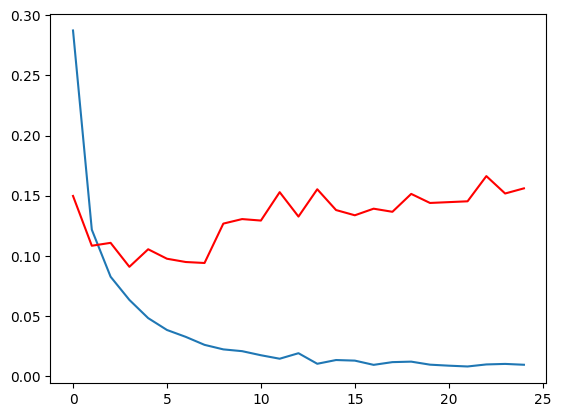

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.show()

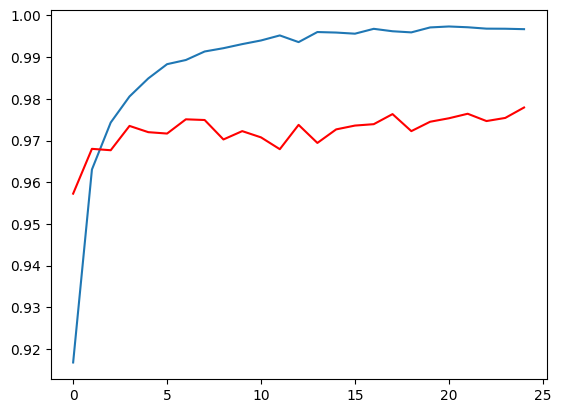

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],color='red')
plt.show()